In [1]:
# Import necessary libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import re
from math import ceil
from sklearn.model_selection import train_test_split
import warnings

In [3]:
pd.options.display.max_columns = None
%matplotlib inline

In [4]:
pwd


'/Users/pradeepvallepalli/Desktop/Full_Stack_Data_Science_Project/cardekho'

In [5]:
car = pd.read_csv('Car-details-v3.csv')

In [6]:
car.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [7]:
car.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [8]:
# check the shape of data
car.shape

(8128, 13)

In [9]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [10]:
car.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [11]:
# cleaning data
car.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [12]:
print(car['seller_type'].unique())
print(car['transmission'].unique())
print(car['owner'].unique())

['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


In [13]:
car['engine'].fillna(0, inplace=True)
car['max_power'].fillna(0, inplace=True)
car['torque'].fillna(0, inplace=True)
car['seats'].fillna(0, inplace=True)
car['mileage'].fillna(0, inplace=True)
car.drop("mileage",axis=1,inplace=True)
car.drop("max_power",axis=1,inplace=True)
car.drop("torque",axis=1,inplace=True)
car.drop("seats",axis=1,inplace=True)



In [14]:
car.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
engine           0
dtype: int64

In [15]:
car.describe()

,year,selling_price,km_driven
count,8128.000000,8.128000e+03,8.128000e+03
mean,2013.804011,6.382718e+05,6.981951e+04
std,4.044249,8.062534e+05,5.655055e+04
min,1983.000000,2.999900e+04,1.000000e+00
25%,2011.000000,2.549990e+05,3.500000e+04
50%,2015.000000,4.500000e+05,6.000000e+04
75%,2017.000000,6.750000e+05,9.800000e+04
max,2020.000000,1.000000e+07,2.360457e+06


In [16]:
car.name.value_counts()

Maruti Swift Dzire VDI                             129
Maruti Alto 800 LXI                                 82
Maruti Alto LXi                                     71
BMW X4 M Sport X xDrive20d                          62
Maruti Swift VDI                                    61
                                                  ... 
Skoda Fabia 1.4 TDI Ambiente                         1
Mahindra Scorpio VLX 2WD AT BSIII                    1
Renault KWID Climber 1.0 AMT                         1
Mahindra XUV300 W8 Option Dual Tone Diesel BSIV      1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV         1
Name: name, Length: 2058, dtype: int64

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas

<AxesSubplot:xlabel='owner', ylabel='selling_price'>

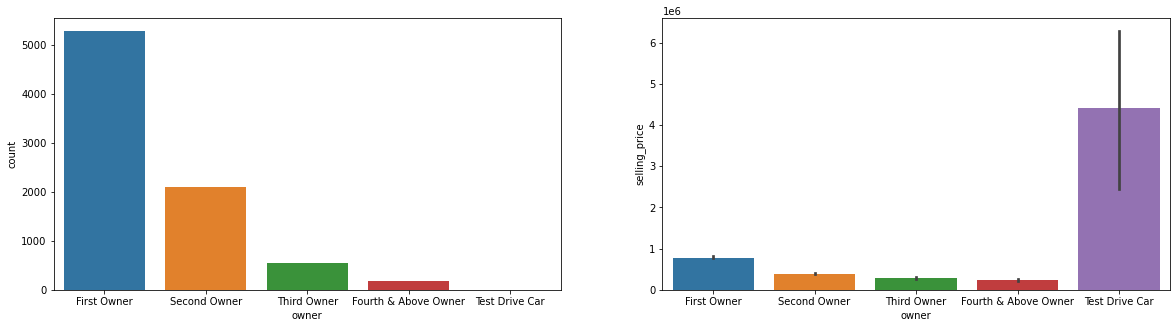

In [19]:
fig, (axis1,axis2)=plt.subplots(1,2,figsize=(20,5))
sns.countplot(x="owner",data=car,ax=axis1)
sns.barplot(x="owner",y="selling_price",data=car,ax=axis2)

The number of respective owners and the selling price at which they are selling their graphs has a similar graph.

<AxesSubplot:xlabel='seller_type', ylabel='selling_price'>

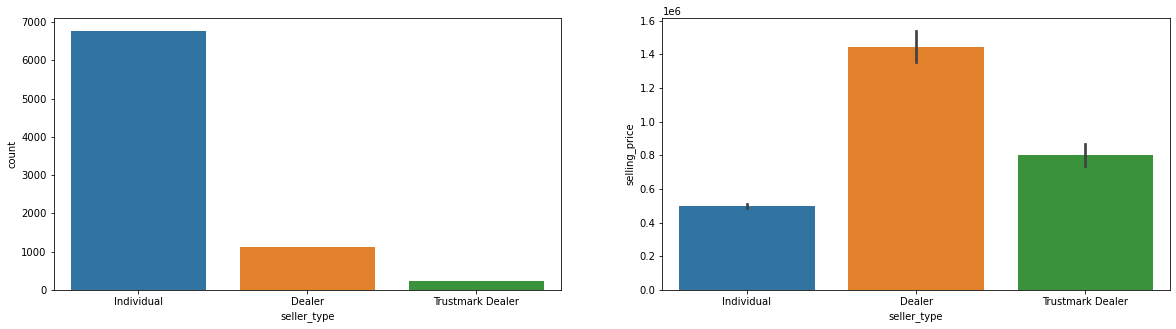

In [20]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize = (20,5))
sns.countplot(x="seller_type", data=car, ax=axis1)
sns.barplot(x="seller_type", y="selling_price",data=car, ax=axis2 )
# Number of Indiviual sellers is the highest but Trustmark dealers are selling the cars for the highest price

Number of Indiviual sellers is the highest but Trustmark dealers are selling the cars for the highest price.


<AxesSubplot:xlabel='km_driven', ylabel='selling_price'>

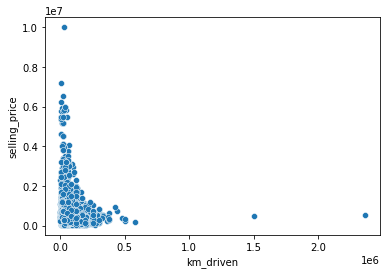

In [21]:
sns.scatterplot(data=car,x="km_driven",y="selling_price")

Cars which are less driven sell for a higher price.


<AxesSubplot:xlabel='transmission', ylabel='selling_price'>

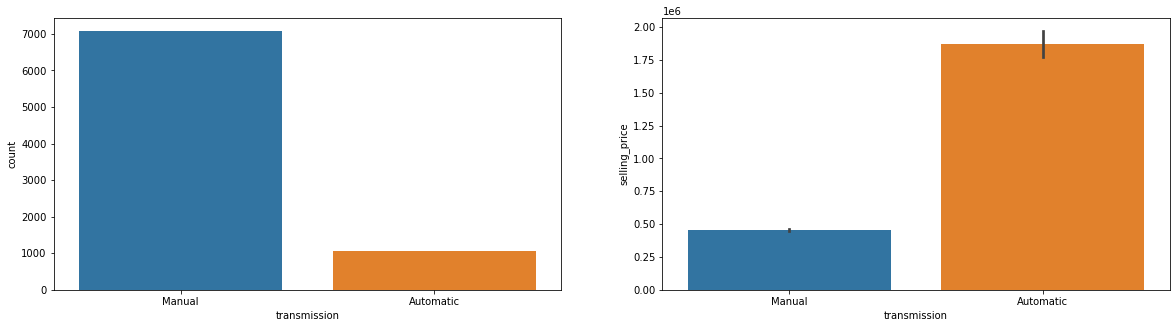

In [22]:
fig, (axis1,axis2)=plt.subplots(1,2,figsize=(20,5))
sns.countplot(x="transmission",data=car,ax=axis1)
sns.barplot(x="transmission",y="selling_price",data=car,ax=axis2)

Number of manual cars being sold is more than automatic, but automatic cars sells at a higher price.

<AxesSubplot:xlabel='age', ylabel='selling_price'>

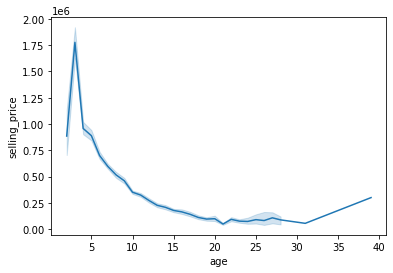

In [23]:
car["age"] = 2022-car["year"]
sns.lineplot(data=car,x="age",y="selling_price")

Newer car Sells for higher prices.

<AxesSubplot:xlabel='fuel', ylabel='selling_price'>

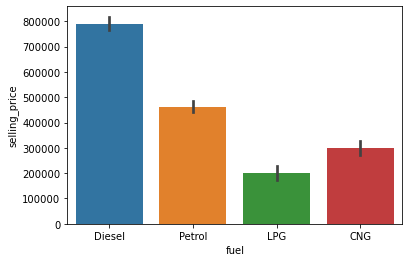

In [24]:
sns.barplot(data=car,x="fuel",y="selling_price")

Diesel cars have the most selling price folowed by petrol.

<AxesSubplot:xlabel='fuel', ylabel='count'>

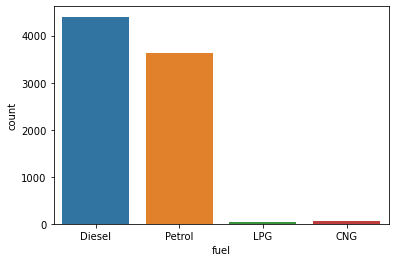

In [25]:
sns.countplot(data=car,x="fuel")

The majority of automobiles sold are diesel, followed by gasoline.

<AxesSubplot:xlabel='seller_type,owner,transmission'>

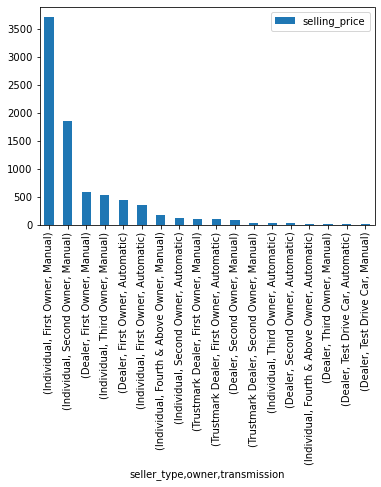

In [26]:
df_seller_owner = car.groupby(by=["seller_type","owner","transmission"])
df_seller_owner.count().sort_values(by="selling_price", ascending=False).plot(kind="bar", y="selling_price")

In [27]:
df_cardekho = pd.get_dummies(car,columns=['fuel','transmission','seller_type',"owner"],drop_first=True)
df_cardekho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   name                          8128 non-null   object
 1   year                          8128 non-null   int64 
 2   selling_price                 8128 non-null   int64 
 3   km_driven                     8128 non-null   int64 
 4   engine                        8128 non-null   object
 5   age                           8128 non-null   int64 
 6   fuel_Diesel                   8128 non-null   uint8 
 7   fuel_LPG                      8128 non-null   uint8 
 8   fuel_Petrol                   8128 non-null   uint8 
 9   transmission_Manual           8128 non-null   uint8 
 10  seller_type_Individual        8128 non-null   uint8 
 11  seller_type_Trustmark Dealer  8128 non-null   uint8 
 12  owner_Fourth & Above Owner    8128 non-null   uint8 
 13  owner_Second Owner

In [28]:
df_cardekho.head()

,name,year,selling_price,km_driven,engine,age,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Manual,seller_type_Individual,seller_type_Trustmark Dealer,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti Swift Dzire VDI,2014,450000,145500,1248 CC,8,1,0,0,1,1,0,0,0,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1498 CC,8,1,0,0,1,1,0,0,1,0,0
2,Honda City 2017-2020 EXi,2006,158000,140000,1497 CC,16,0,0,1,1,1,0,0,0,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1396 CC,12,1,0,0,1,1,0,0,0,0,0
4,Maruti Swift VXI BSIII,2007,130000,120000,1298 CC,15,0,0,1,1,1,0,0,0,0,0


Individual categorical fields have been converted into numerical data, for example, field "fuel" is now divided into fields fuel petrol, fuel dieseland so on.

# Linear Regression:
Before we begin working on the linear regression model, we divide our data into test and training sets.

In [31]:
df_cardekho.drop("engine",axis=1,inplace=True)

In [32]:
df_cardekho.head()

,name,year,selling_price,km_driven,age,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Manual,seller_type_Individual,seller_type_Trustmark Dealer,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti Swift Dzire VDI,2014,450000,145500,8,1,0,0,1,1,0,0,0,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,8,1,0,0,1,1,0,0,1,0,0
2,Honda City 2017-2020 EXi,2006,158000,140000,16,0,0,1,1,1,0,0,0,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,12,1,0,0,1,1,0,0,0,0,0
4,Maruti Swift VXI BSIII,2007,130000,120000,15,0,0,1,1,1,0,0,0,0,0


In [35]:
#importing requirements
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor


In [36]:
#splitting the data
(Y, X) = (df_cardekho['selling_price'].values, df_cardekho.drop(['selling_price','name'], axis = 1))
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size = 0.3)


In [37]:
# Training the model and calculating percentage of error

lr = LinearRegression()
lr.fit(X_train,Y_train)
predicted_prices = lr.predict(X_test)

def mean_absolute_percentage_error(Y_test,predicted_prices): 
    return np.mean(np.abs((Y_test-predicted_prices) / Y_test)) * 100
mean_absolute_percentage_error(Y_test,predicted_prices)

73.6711527806041

# As we do not have a very good percentage of accuracy, let us try to remove some columns and try feeding into our regression model

In [39]:
#splitting the data
(B, A) = (df_cardekho['selling_price'].values, df_cardekho.drop(['selling_price','name','fuel_LPG', 'year'], axis = 1))
B = B.reshape((-1,1))
(A_train, A_test, B_train, B_test) = train_test_split(A, B, test_size = 0.3)

In [40]:
lr = LinearRegression()
lr.fit(A_train,B_train)
predicted_prices = lr.predict(A_test)

def mean_absolute_percentage_error(B_test,predicted_prices): 
    return np.mean(np.abs((B_test-predicted_prices) / B_test)) * 100
mean_absolute_percentage_error(B_test,predicted_prices)

78.89654391087592

We get a slightly better error percentage,by removing fields like 'fuel_LPG' and 'year'

Let us further try to improve on the accuracy of our model by feature selection, the criteria for it would be based on the EDA we have done before

In [42]:
#splitting the data
(B, A) = (df_cardekho['selling_price'].values, df_cardekho.drop(['selling_price','km_driven','owner_Third Owner','owner_Fourth & Above Owner','fuel_Petrol','fuel_Diesel','name','fuel_LPG', 'year'], axis = 1))
B = B.reshape((-1,1))
(A_train, A_test, B_train, B_test) = train_test_split(A, B, test_size = 0.3)

In [43]:
lr = LinearRegression()
lr.fit(A_train,B_train)
predicted_prices = lr.predict(A_test)

def mean_absolute_percentage_error(B_test,predicted_prices): 
    return np.mean(np.abs((B_test-predicted_prices) / B_test)) * 100
mean_absolute_percentage_error(B_test,predicted_prices)

70.03033896413119

By using feature selection we got our error percentage down from 74% to 65%, let's see if changing the model affects our error percentage positively

In [44]:
from sklearn.ensemble import ExtraTreesRegressor
#in ensemble predictions of several base estimators are built in with a given learning algorithm.
#we used ExtraTreesRegressor
model = ExtraTreesRegressor()
#This class implements a meta estimator that fits a number of randomized decision trees 
#on various sub-samples of the dataset and uses averaging to improve the 
#predictive accuracy and control over-fitting.
model.fit(X,Y)

ExtraTreesRegressor()

In [45]:
print(model.feature_importances_)
#shows the feature importance that contribute to the selling price feature


[1.20338337e-01 1.93288210e-01 1.04595419e-01 4.94264591e-02
 6.73021420e-06 6.35983367e-02 3.65846921e-01 6.49641641e-02
 1.79845990e-02 4.50784682e-04 7.66603149e-03 1.02679755e-02
 1.56603261e-03]


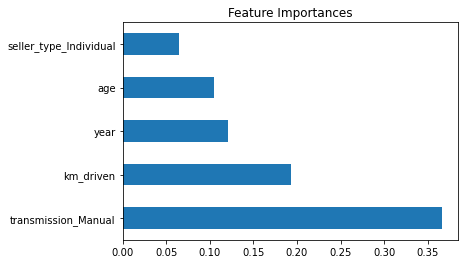

In [46]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title('Feature Importances')
plt.show()

In [47]:
from sklearn.model_selection import train_test_split #class to divide the data into train and validation set

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
#we divide the data into 2 parts :- 80% train and 20% test data 
# and random_state is used to guarantee that same sequence of 
#random numbers are generated each time you run the code. 
#And unless there is some other randomness present in the process, 
#the results produced will be same as always.

In [48]:
X_train.shape

(6502, 13)

In [49]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()

#A random forest regressor is an estimator that fits a number of classifying decision trees 
on various sub-samples of the dataset and uses averaging to improve the prediction accuracy 
and control over-fitting.

In [50]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
#n_estimators is a parameter of the random forest regressor which is used to control no of trees in the forest
#so we use 100 200 ....1200 trees for the model
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [51]:
#Randomized Search CV
# Number of features to consider at every split
max_features = ['auto', 'sqrt'] # we first consider all the features and 
#then sqare root number of features to train the model

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
#we create trees with 5 10 15 for each model...and train it

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# we split as 2 nodes forest then 5 then 10 like that till 100 from the list

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [52]:
max_depth

[5, 10, 15, 20, 25, 30]

In [53]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized search on hyper parameters.
#used to select the best parameter for the model

In [54]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [55]:
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [56]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [57]:
predictions=rf_random.predict(X_test)

In [58]:
predictions1=rf_random.predict(X_train)

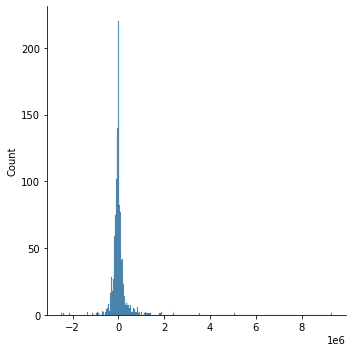

In [60]:
sns.displot(y_test-predictions)

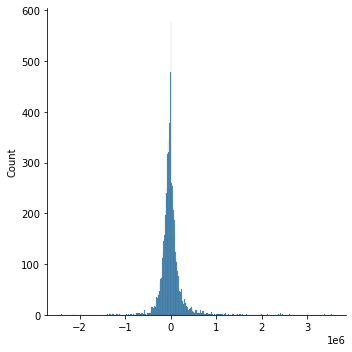

In [61]:
sns.displot(y_train-predictions1)

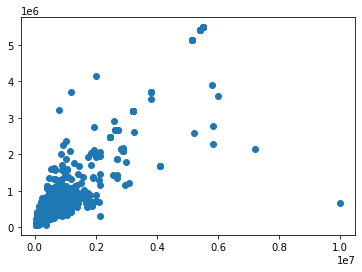

In [62]:
plt.scatter(y_test,predictions)

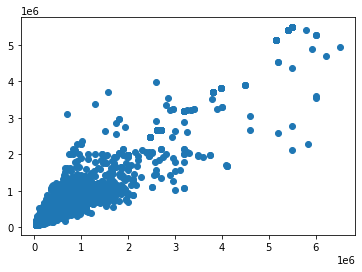

In [63]:
plt.scatter(y_train,predictions1)


In [64]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)
#we use a pickle file to store the data in a byte stream format

In [70]:
from sklearn.metrics import r2_score
r = r2_score(y_test, predictions)
print("R2 score : {}" . format(r))

R2 score : 0.7258297945366634


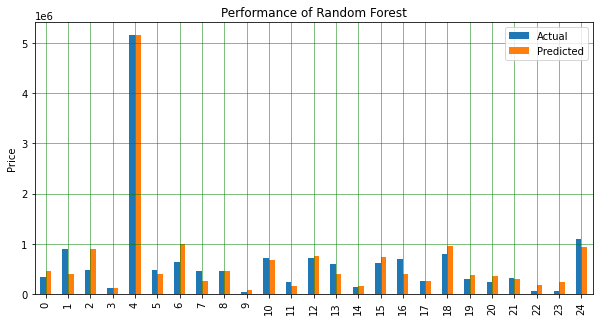

In [71]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df_check = df_check.head(25)
#round(df_check,2)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of Random Forest')
plt.ylabel('Price')
plt.show()